## Seminar 3 - FFT filter bank

4 subband FFT filter bank should be comared with FB from Seminar 3.

In [1]:
import numpy as np
import sound
import scipy.signal as sig
import scipy.optimize as opt
import scipy.io.wavfile as wav
import pyaudio
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [8,6]

Load audio file

In [25]:
pathToAudio = "data/Track48.wav"
fs, data = wav.read(pathToAudio)
duration = 5 # seconds
audio = np.array(data[:fs*duration,0]) # use only one channel
print('Sampling rate: {}'.format(fs))
print('Data Type: ', audio.dtype)
print('Shape of one channel: {}'.format(audio.shape))

Sampling rate: 44100
Data Type:  int16
Shape of one channel: (220500,)


In [3]:
nTabs = 64
blocksize = 8
nSubbands = 4

FFT via FFT Matrix

In [4]:
I = np.eye(blocksize)
fftMat = np.fft.fft(I)
print(fftMat)

[[ 1.00000000e+00+0.        j  1.00000000e+00+0.        j
   1.00000000e+00+0.        j  1.00000000e+00+0.        j
   1.00000000e+00+0.        j  1.00000000e+00+0.        j
   1.00000000e+00+0.        j  1.00000000e+00+0.        j]
 [ 1.00000000e+00+0.        j  7.07106781e-01-0.70710678j
   0.00000000e+00-1.        j -7.07106781e-01-0.70710678j
  -1.00000000e+00+0.        j -7.07106781e-01+0.70710678j
   0.00000000e+00+1.        j  7.07106781e-01+0.70710678j]
 [ 1.00000000e+00+0.        j -8.26946080e-16-1.        j
  -1.00000000e+00+0.        j  8.26946080e-16+1.        j
   1.00000000e+00+0.        j -8.26946080e-16-1.        j
  -1.00000000e+00+0.        j  8.26946080e-16+1.        j]
 [ 1.00000000e+00+0.        j -7.07106781e-01-0.70710678j
   0.00000000e+00+1.        j  7.07106781e-01-0.70710678j
  -1.00000000e+00+0.        j  7.07106781e-01+0.70710678j
   0.00000000e+00-1.        j -7.07106781e-01+0.70710678j]
 [ 1.00000000e+00+0.        j -1.00000000e+00+0.        j
   1.00000

Compute blockwise FFT on blocks of 8 samples:

In [34]:
newlength = audio.shape[0] - (audio.shape[0] % blocksize) # length so it fits into blocks of size blocksize
stackedBlocks = np.reshape(audio[0:newlength],(int(newlength/blocksize), blocksize))
transformed = np.dot(stackedBlocks, fftMat)
print(stackedBlocks.dtype)

int16


In [35]:
for i in range(blocksize):
    print("Playing Downsampled signal at phase {}".format(i))
    sound.sound(np.real(stackedBlocks[:,i]),int(fs/blocksize))

Playing Downsampled signal at phase 0
* done
Playing Downsampled signal at phase 1
* done
Playing Downsampled signal at phase 2
* done
Playing Downsampled signal at phase 3
* done
Playing Downsampled signal at phase 4
* done
Playing Downsampled signal at phase 5
* done
Playing Downsampled signal at phase 6
* done
Playing Downsampled signal at phase 7
* done


### Task b)

Plot of the resulting subband filters and filtered subbands.

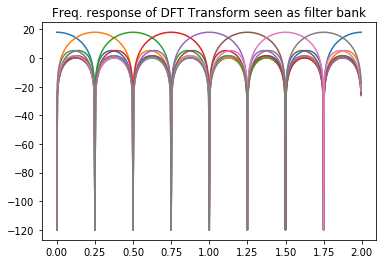

In [9]:
for bandIx in range(blocksize):
    w,h = sig.freqz(np.flipud(fftMat[:,bandIx]),whole=True)
    plt.plot(w/np.pi, 20*np.log10(abs(h)+1e-6))
plt.title('Freq. response of DFT Transform seen as filter bank')
plt.show()

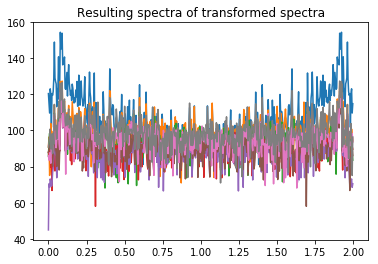

In [10]:
for bandIx in range(blocksize):
    w,h = sig.freqz(transformed[:,bandIx],whole=True)
    plt.plot(w/np.pi, 20*np.log10(abs(h)+1e-6))
plt.title('Resulting spectra of transformed spectra')
plt.show()

### Task c)
Apply inverse FFT to obtain reconstructed signal.

In [14]:
reconBlocks = np.dot(transformed, np.linalg.inv(fftMat))
reconAudio = np.reshape(reconBlocks, reconBlocks.shape[0] * reconBlocks.shape[1])

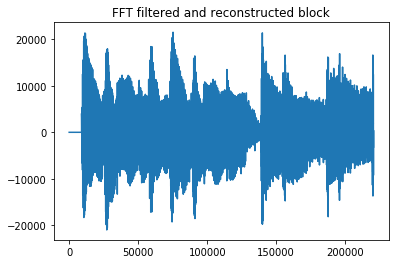

In [24]:
plt.plot(np.real(reconAudio))
plt.title('FFT filtered and reconstructed block')
plt.show()

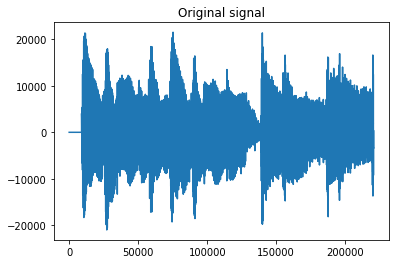

In [22]:
plt.plot(audio)
plt.title('Original signal')
plt.show()

Listen to original and reconstructed signal:

In [29]:
print("Playing Original")
sound.sound(audio,fs)

Playing Original
* done


In [30]:
print("Playing Reconstructed signal")
sound.sound(np.real(reconAudio),fs)

Playing Reconstructed signal
* done
